Below is the code to obtain the SIMLIB file of the DDF regions (WFD or others, whatever you want):

In [ ]:
# We download, install and import the OpSimSummary library
!git clone https://github.com/bastiencarreres/OpSimSummaryV2.git
%cd OpSimSummaryV2
!pip install .
import opsimsummaryv2 as opsim

# We download the database of the fields (too big, be patient)
!wget https://s3df.slac.stanford.edu/data/rubin/sim-data/sims_featureScheduler_runs3.4/baseline/baseline_v3.4_10yrs.db

# Read the data base
OpSimSurv = opsim.OpSimSurvey('baseline_v3.4_10yrs.db')

Finished compute healpy representation, total number of fields : 388936.


,hp_ra,hp_dec,n_visits,field_label
ipix,,,,
362409,2.610835,0.078205,1827,DDF
362410,2.616971,0.078205,2727,DDF
362411,2.623107,0.078205,2846,DDF
362412,2.629243,0.078205,2174,DDF
363432,2.601631,0.075593,1505,DDF
...,...,...,...,...
698791,1.048450,-0.891201,1931,DDF
699622,1.015731,-0.894583,1226,DDF
699623,1.023283,-0.894583,1553,DDF


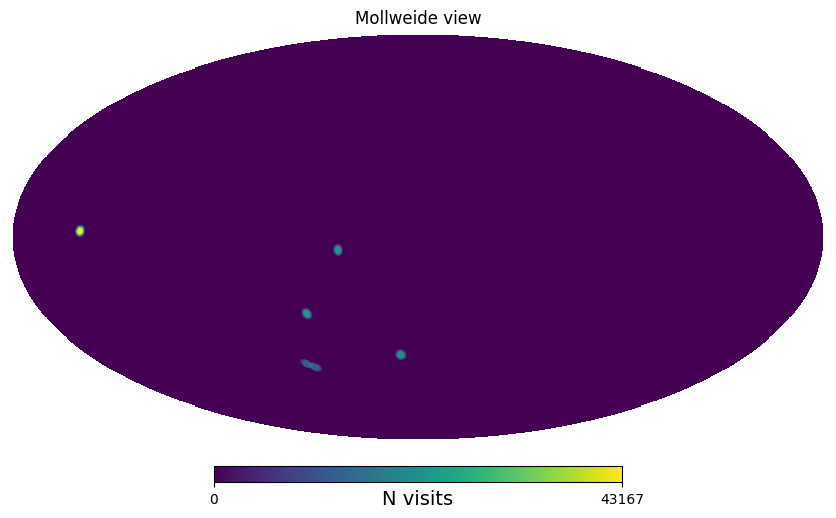

In [ ]:
# Compute the healpy representation of the survey (if you want to restart the filters, just compute it again)
OpSimSurv.compute_hp_rep()

# Filter by teh field youre interested and show it
OpSimSurv._hp_rep = OpSimSurv._hp_rep[OpSimSurv._hp_rep["field_label"] == "DDF"]
display(OpSimSurv._hp_rep)

fig = OpSimSurv.plot_hp_rep()

In [ ]:
# Sample the survey
N_fields = len(OpSimSurv._hp_rep) # We want all if it's small, but you can adjust it
seed = 1234

OpSimSurv.sample_survey(N_fields, random_seed=seed)

# Writing simlib
sim = opsim.sim_io.SNANA_Simlib(OpSimSurv, out_path='./SIMLIB_files/')
sim.write_SIMLIB()

Writing SIMLIB in example_files/baseline_v3.4_10yrs.SIMLIB


KeyboardInterrupt: 